In [ ]:
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n.random.seed(42)
data = {
    'income': n.random.randint(2000, 20000, 500),
    'debts': n.random.randint(0, 15000, 500),
    'late_payments': n.random.randint(0, 10, 500),
    'credit_utilization': n.random.uniform(0.1, 1.0, 500),
    'creditworthy': n.random.choice([0, 1], 500, p=[0.4, 0.6])  # 0=bad, 1=good
}
df = p.DataFrame(data)

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   income  debts  late_payments  credit_utilization  creditworthy
0   17795   2105              7            0.511689             0
1    2860   3627              7            0.452053             0
2    7390  12972              6            0.345663             1
3   13964   6316              7            0.529009             1
4   13284   1852              2            0.139939             0


In [ ]:
X = df.drop("creditworthy", axis=1)
y = df["creditworthy"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

In [ ]:
for name, model in models.items():
    print(f"\n......................")
    print(f"🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]


......................
🔹 Model: Logistic Regression

......................
🔹 Model: Decision Tree

......................
🔹 Model: Random Forest


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
auc = roc_auc_score(y_test, y_prob)
results[name] = {"report": report, "roc_auc": auc}

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.36      0.41        70
           1       0.55      0.68      0.60        80

    accuracy                           0.53       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.52      0.53      0.51       150

Confusion Matrix:
[[25 45]
 [26 54]]
ROC-AUC Score: 0.5244642857142858


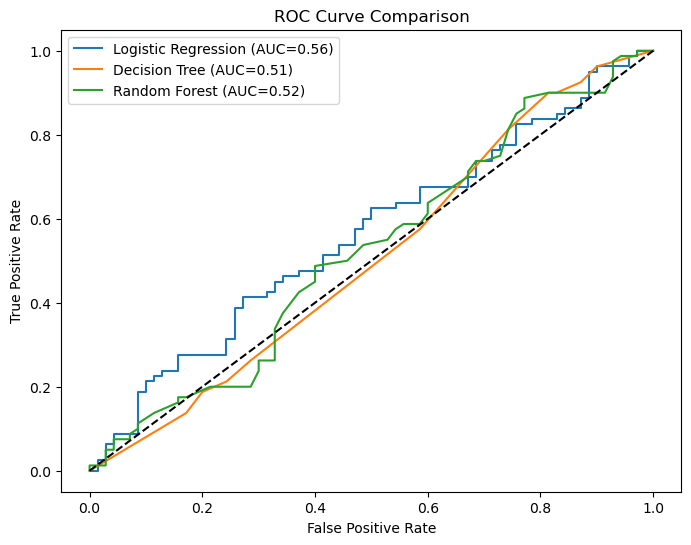

In [ ]:

#ROC Curve Comparison

pl.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    pl.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")

pl.plot([0,1],[0,1],'k--')
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("ROC Curve Comparison")
pl.legend()
pl.show()
